In [2]:
import argparse
import model
from keras.models import load_model
import cv2
import subprocess
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.
/Users/saboten/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
def prepare_image(img):
    img = cv2.resize(img, (224, 224))
    img = img.astype(np.float32)
    mean = np.array([103.939, 116.779, 123.68], dtype=np.float32).reshape(1, 1, 3)
    img -= mean 
    return img

def predict_core(face_model, img_np_mat):
    img = prepare_image(img_np_mat)
    predicted = face_model.predict(np.array([img]))
    pre_num = np.array([predicted[0][i]*i for i in range(101)])        
    return np.sum(pre_num)


In [1]:
#!ls /home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv*
!ls /Users/saboten/data/imdb_face_vgg_all/imdb_224_all-cv*

/Users/saboten/data/imdb_face_vgg_all/imdb_224_all-cv-0.npz
/Users/saboten/data/imdb_face_vgg_all/imdb_224_all-cv-1.npz
/Users/saboten/data/imdb_face_vgg_all/imdb_224_all-cv-10.npz
/Users/saboten/data/imdb_face_vgg_all/imdb_224_all-cv-100.npz


In [10]:
np_mat0 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-0.npz')

In [69]:
img, age,gender = np_mat0['image'], np_mat0['age'], np_mat0['gender']

In [12]:
img.shape

(32, 224, 224, 3)

In [13]:
age.shape

(32,)

In [11]:
#face_model = load_model('/home/jiman/mljob/face_age_vgg_face_20180213_202347/checkpoint.03.hdf5', compile=False)
face_model = load_model('/Users/saboten/mljob/face_age_vgg_face_20180213_202347/checkpoint.03.hdf5', compile=False)
model.compile_model(face_model, learning_rate=0.001)

In [9]:
def prepare_image(img):
    img = cv2.resize(img, (224, 224))
    img = img.astype(np.float32)
    mean = np.array([103.939, 116.779, 123.68], dtype=np.float32).reshape(1, 1, 3)
    img -= mean 
    return img

def predict_core(face_model, img_np_mat):
    img = prepare_image(img_np_mat)
    predicted = face_model.predict(np.array([img]))
    pre_num = np.array([predicted[0][i]*i for i in range(101)])        
    return np.sum(pre_num)

In [7]:
def error_and_showimg(img, age, gender):
    fig = plt.figure(figsize=(16, 16))
    columns = 8
    rows = 4
    for i in range(1, columns*rows+1):
        pre_im = prepare_image(img[i-1])
        pred_age = int(np.abs(predict_core(face_model, pre_im)))
        age_diff = np.abs(age[i-1]-pred_age)
        if age_diff > 10.0:
            fig.add_subplot(rows, columns, i)
            plt.imshow(cv2.cvtColor(img[i-1], cv2.COLOR_BGR2RGB))
            plt.title('e=%s,r=%s,p=%s,\ng=%s' % (age_diff,age[i-1], pred_age, gender[i-1]))
            plt.axis('off')
    plt.show()

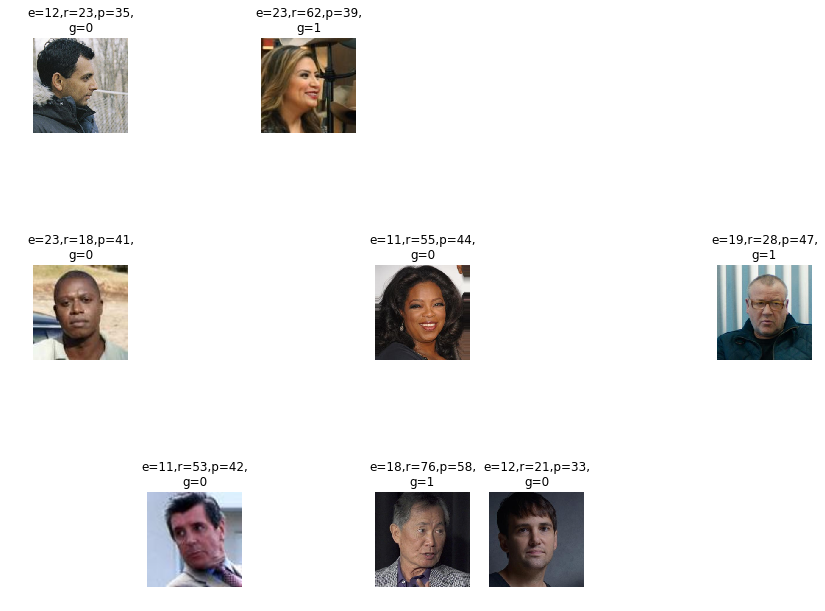

In [78]:
error_and_showimg(img, age, gender)

In [79]:
np_mat1 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-1.npz')
img1, age1,gender1 = np_mat1['image'], np_mat1['age'], np_mat1['gender']

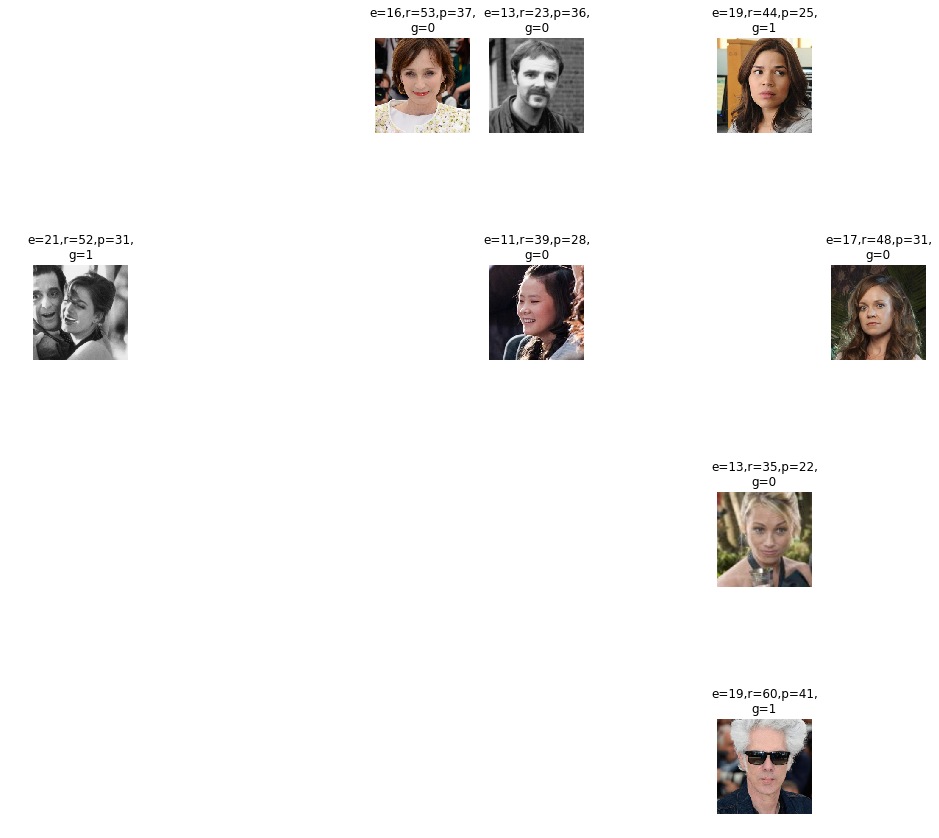

In [80]:
error_and_showimg(img1, age1, gender1)

In [81]:
np_mat2 = np.load('/home/jiman/data/imdb_face_vgg_all/imdb_224_all-cv-2.npz')
img2, age2,gender2 = np_mat2['image'], np_mat2['age'], np_mat2['gender']

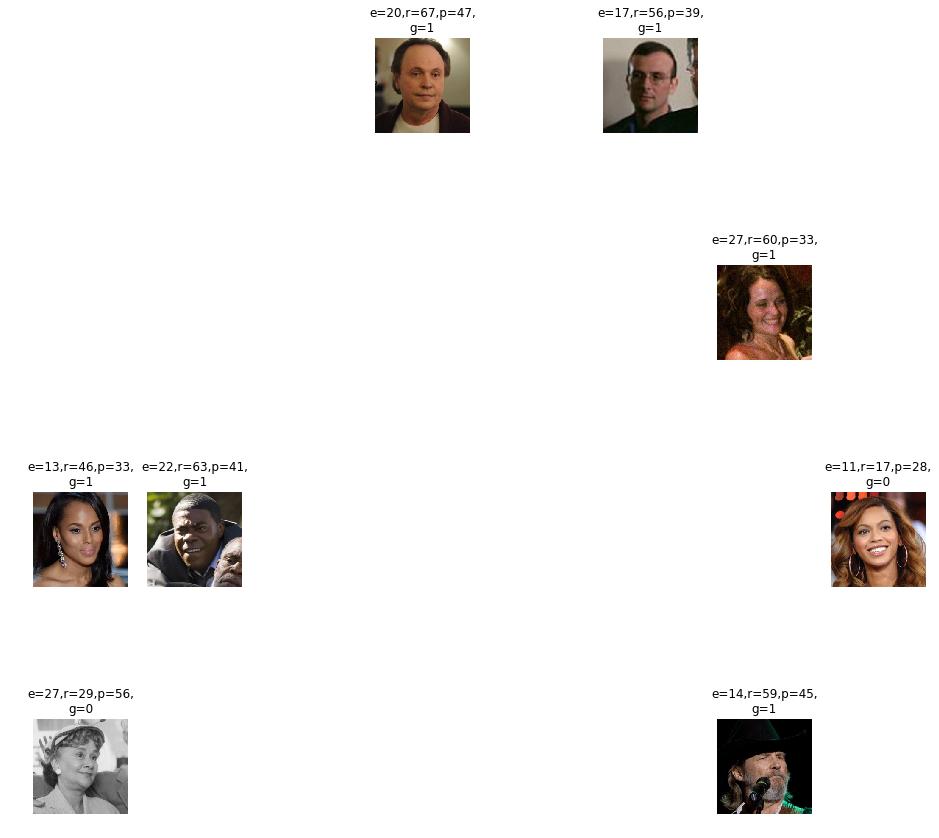

In [82]:
error_and_showimg(img2, age2, gender2)

In [5]:
np_mat3 = np.load('/Users/saboten/data/imdb_face_vgg_all/imdb_224_all-cv-10.npz')
img3, age3,gender3 = np_mat3['image'], np_mat3['age'], np_mat3['gender']

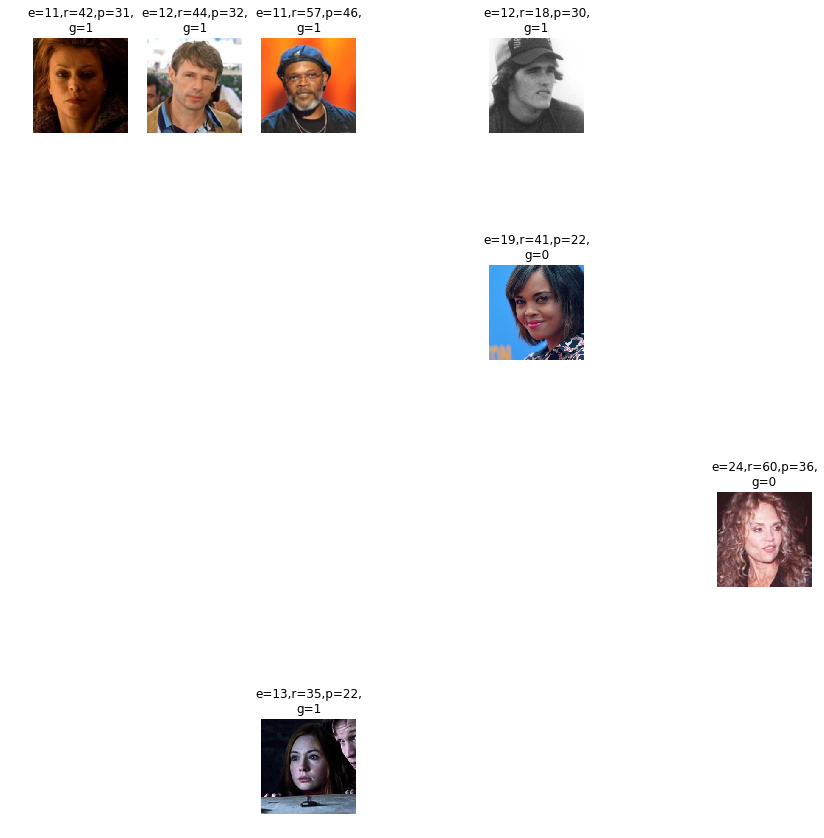

In [13]:
error_and_showimg(img3, age3, gender3)

In [ ]:
np_mat3 = np.load('/Users/saboten/data/imdb_face_vgg_all/imdb_224_all-cv-100.npz')
img3, age3,gender3 = np_mat3['image'], np_mat3['age'], np_mat3['gender']